In [1]:
#  Import libraries

import pandas as pd                                 # Pandas for reading and writing spreadsheets
import numpy as np                                  # Numpy for carrying out efficient computations
from matplotlib import pyplot as plt                # Matplotlib for visualization of data
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as sc
from scipy.spatial.distance import cdist

In [2]:
# import csv files
read_df=pd.read_csv('review_ratings.csv')

In [3]:
# print the data set with number of rows and columns
read_df

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
5,User 6,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
6,User 7,0.00,5.00,3.63,3.63,5.00,2.92,3.03,2.35,2.33,...,1.75,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
7,User 8,0.00,5.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,...,1.74,0.60,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
8,User 9,0.00,5.00,3.64,3.64,5.00,2.92,3.03,2.62,2.32,...,0.75,0.60,0.00,0.00,0.50,0.00,0.00,0.0,0.00,0.00
9,User 10,0.00,5.00,3.64,3.64,5.00,2.92,5.00,2.35,2.32,...,0.74,0.59,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00


In [4]:
# head() defines read first 5 data 
read_df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [5]:
# tail() defines read last 5 data 
read_df.tail()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12
5455,User 5456,0.95,4.07,5.00,2.82,2.80,2.57,2.42,1.02,1.74,...,0.85,0.64,0.62,0.63,0.78,5.00,1.08,5.0,5.0,1.17


In [6]:
# changing column name
column_names=['U_Id','Churches','Resorts','Beaches','Parks','Theatres','Museums','Malls','Zoo','Restaurants','Pubs_Bars','Local_Services','Burger_Pizza_Shops','Hotels','Juice_Bars','Art_Galleries','Dance_Clubs','Swimming_Pool','Gyms','Bakeries','Beauty_Spa','Cafes','View_Points','Monuments','Gardens']
read_df.columns=column_names


In [7]:
# print columns
read_df

,U_Id,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,...,Art_Galleries,Dance_Clubs,Swimming_Pool,Gyms,Bakeries,Beauty_Spa,Cafes,View_Points,Monuments,Gardens
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
5,User 6,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
6,User 7,0.00,5.00,3.63,3.63,5.00,2.92,3.03,2.35,2.33,...,1.75,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
7,User 8,0.00,5.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,...,1.74,0.60,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
8,User 9,0.00,5.00,3.64,3.64,5.00,2.92,3.03,2.62,2.32,...,0.75,0.60,0.00,0.00,0.50,0.00,0.00,0.0,0.00,0.00
9,User 10,0.00,5.00,3.64,3.64,5.00,2.92,5.00,2.35,2.32,...,0.74,0.59,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00


In [8]:
# shape define number of rows and columns
read_df.shape

(5456, 25)

In [9]:
# describe shows mean, std, min,max
read_df.describe()

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs_Bars,...,Art_Galleries,Dance_Clubs,Swimming_Pool,Gyms,Bakeries,Beauty_Spa,Cafes,View_Points,Monuments,Gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
# info shows detail of all columns
read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
U_Id                  5456 non-null object
Churches              5456 non-null float64
Resorts               5456 non-null float64
Beaches               5456 non-null float64
Parks                 5456 non-null float64
Theatres              5456 non-null float64
Museums               5456 non-null float64
Malls                 5456 non-null float64
Zoo                   5456 non-null float64
Restaurants           5456 non-null float64
Pubs_Bars             5456 non-null float64
Local_Services        5456 non-null float64
Burger_Pizza_Shops    5455 non-null float64
Hotels                5456 non-null float64
Juice_Bars            5456 non-null float64
Art_Galleries         5456 non-null float64
Dance_Clubs           5456 non-null float64
Swimming_Pool         5456 non-null float64
Gyms                  5456 non-null float64
Bakeries              5456 non-null float64
Beauty_Spa    

In [11]:
# dtype show each data types
read_df.dtypes

U_Id                   object
Churches              float64
Resorts               float64
Beaches               float64
Parks                 float64
Theatres              float64
Museums               float64
Malls                 float64
Zoo                   float64
Restaurants           float64
Pubs_Bars             float64
Local_Services        float64
Burger_Pizza_Shops    float64
Hotels                float64
Juice_Bars            float64
Art_Galleries         float64
Dance_Clubs           float64
Swimming_Pool         float64
Gyms                  float64
Bakeries              float64
Beauty_Spa            float64
Cafes                 float64
View_Points           float64
Monuments             float64
Gardens               float64
dtype: object

In [12]:
# checking type as float
read_df.Local_Services=read_df.Local_Services.astype('float')        

In [13]:
Local_Services_mean=read_df['Local_Services'][read_df['Local_Services']!='2\t2.']
read_df['Local_Services'][read_df['Local_Services']=='2\t2.']=np.mean(Local_Services_mean.astype('float64'))
read_df['Local_Services']=read_df['Local_Services'].astype('float')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
read_df.dtypes

U_Id                   object
Churches              float64
Resorts               float64
Beaches               float64
Parks                 float64
Theatres              float64
Museums               float64
Malls                 float64
Zoo                   float64
Restaurants           float64
Pubs_Bars             float64
Local_Services        float64
Burger_Pizza_Shops    float64
Hotels                float64
Juice_Bars            float64
Art_Galleries         float64
Dance_Clubs           float64
Swimming_Pool         float64
Gyms                  float64
Bakeries              float64
Beauty_Spa            float64
Cafes                 float64
View_Points           float64
Monuments             float64
Gardens               float64
dtype: object

In [15]:
# checking the columns if it contains null values(NA)[1] or not[0]
# isnull() defines checks null values 
# sum() defines no. of null values
read_df[column_names].isnull().sum()

U_Id                  0
Churches              0
Resorts               0
Beaches               0
Parks                 0
Theatres              0
Museums               0
Malls                 0
Zoo                   0
Restaurants           0
Pubs_Bars             0
Local_Services        0
Burger_Pizza_Shops    1
Hotels                0
Juice_Bars            0
Art_Galleries         0
Dance_Clubs           0
Swimming_Pool         0
Gyms                  0
Bakeries              0
Beauty_Spa            0
Cafes                 0
View_Points           0
Monuments             0
Gardens               1
dtype: int64

In [16]:
# remove rows having null values
read_df=read_df.dropna()

In [17]:
# checking the columns with new variable
read_df.isnull().sum()

U_Id                  0
Churches              0
Resorts               0
Beaches               0
Parks                 0
Theatres              0
Museums               0
Malls                 0
Zoo                   0
Restaurants           0
Pubs_Bars             0
Local_Services        0
Burger_Pizza_Shops    0
Hotels                0
Juice_Bars            0
Art_Galleries         0
Dance_Clubs           0
Swimming_Pool         0
Gyms                  0
Bakeries              0
Beauty_Spa            0
Cafes                 0
View_Points           0
Monuments             0
Gardens               0
dtype: int64

In [18]:
# check data type of every column
read_df.dtypes

U_Id                   object
Churches              float64
Resorts               float64
Beaches               float64
Parks                 float64
Theatres              float64
Museums               float64
Malls                 float64
Zoo                   float64
Restaurants           float64
Pubs_Bars             float64
Local_Services        float64
Burger_Pizza_Shops    float64
Hotels                float64
Juice_Bars            float64
Art_Galleries         float64
Dance_Clubs           float64
Swimming_Pool         float64
Gyms                  float64
Bakeries              float64
Beauty_Spa            float64
Cafes                 float64
View_Points           float64
Monuments             float64
Gardens               float64
dtype: object

In [19]:
# describe first 12 columns
read_df[column_names[:12]].describe()

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs_Bars,Local_Services
count,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000
mean,1.455746,2.320048,2.489059,2.797103,2.958904,2.893423,3.351476,2.541177,3.126542,2.832695,2.549622
std,0.827732,1.421576,1.247503,1.309188,1.338785,1.282101,1.413291,1.111398,1.356774,1.307299,1.381498
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,0.780000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.790000,1.930000,1.620000,1.800000,1.640000,1.580000
50%,1.340000,1.910000,2.060000,2.460000,2.670000,2.680000,3.230000,2.170000,2.800000,2.680000,2.000000
75%,1.810000,2.687500,2.740000,4.097500,4.310000,3.837500,5.000000,3.190000,5.000000,3.527500,3.217500
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [20]:
# describe after 12th column till last
read_df[column_names[12:]].describe()

,Burger_Pizza_Shops,Hotels,Juice_Bars,Art_Galleries,Dance_Clubs,Swimming_Pool,Gyms,Bakeries,Beauty_Spa,Cafes,View_Points,Monuments,Gardens
count,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000
mean,2.078401,2.125820,2.190429,2.206140,1.192710,0.949349,0.822525,0.969250,0.999626,0.965275,1.749345,1.531051,1.560570
std,1.249315,1.406682,1.576505,1.715848,1.107176,0.973628,0.948015,1.202883,1.193129,0.928326,1.597816,1.316180,1.171784
min,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,2.287500,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


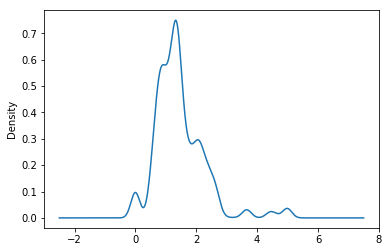

In [21]:
# plot density curve of Churches after cleaning null values
read_df.Churches.plot.density()

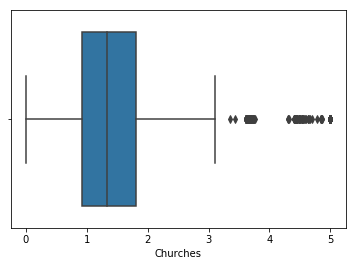

In [22]:
# plotting box plot of Churches
sns.boxplot(read_df['Churches'])

In [23]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
read_df.Churches.describe()

count    5454.000000
mean        1.455746
std         0.827732
min         0.000000
25%         0.920000
50%         1.340000
75%         1.810000
max         5.000000
Name: Churches, dtype: float64

In [24]:
# displaying mode 
read_df.Churches.mode()

0    0.0
dtype: float64

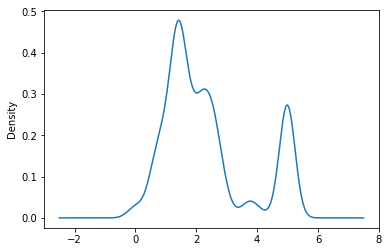

In [25]:
# plot density curve of Resorts after cleaning null values
read_df.Resorts.plot.density()

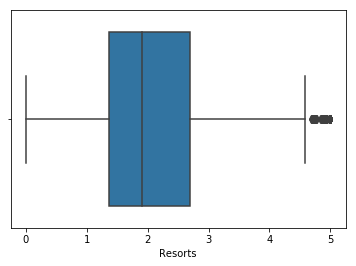

In [26]:
# plotting box plot of Resorts
sns.boxplot(read_df['Resorts'])  

In [27]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
read_df.Resorts.describe()

count    5454.000000
mean        2.320048
std         1.421576
min         0.000000
25%         1.360000
50%         1.910000
75%         2.687500
max         5.000000
Name: Resorts, dtype: float64

In [28]:
# displaying mode 
read_df.Resorts.mode()

0    5.0
dtype: float64

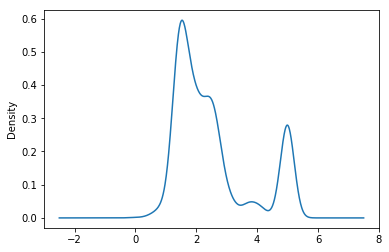

In [29]:
# plot density curve of Beaches after cleaning null values
read_df.Beaches.plot.density()

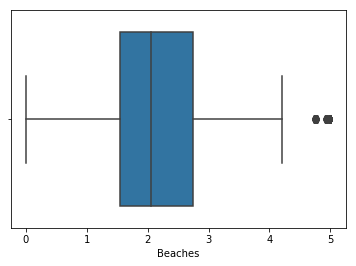

In [30]:
# plotting box plot of Beaches
sns.boxplot(read_df['Beaches']) 

In [31]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
read_df.Beaches.describe()

count    5454.000000
mean        2.489059
std         1.247503
min         0.000000
25%         1.540000
50%         2.060000
75%         2.740000
max         5.000000
Name: Beaches, dtype: float64

In [32]:
# displaying mode 
read_df.Beaches.mode()

0    5.0
dtype: float64

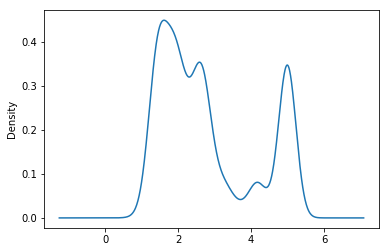

In [33]:
# plot density curve of Parks after cleaning null values
read_df.Parks.plot.density()

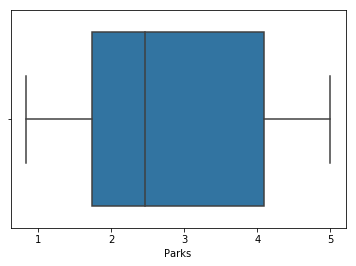

In [34]:
# plotting box plot of Parks
sns.boxplot(read_df['Parks'])   

In [35]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
read_df.Parks.describe()

count    5454.000000
mean        2.797103
std         1.309188
min         0.830000
25%         1.730000
50%         2.460000
75%         4.097500
max         5.000000
Name: Parks, dtype: float64

In [36]:
# displaying mode 
read_df.Parks.mode()

0    5.0
dtype: float64

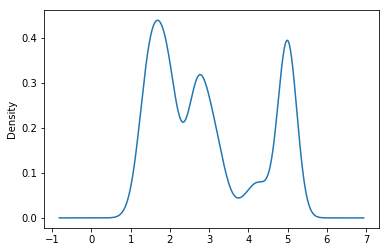

In [37]:
# plot density curve of Theatres after cleaning null values
read_df.Theatres.plot.density()

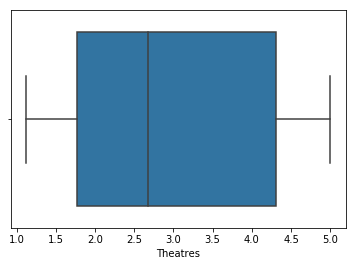

In [38]:
# plotting box plot of Theatres
sns.boxplot(read_df['Theatres'])   

In [39]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
read_df.Theatres.describe()

count    5454.000000
mean        2.958904
std         1.338785
min         1.120000
25%         1.770000
50%         2.670000
75%         4.310000
max         5.000000
Name: Theatres, dtype: float64

In [40]:
# displaying mode 
read_df.Theatres.mode()

0    5.0
dtype: float64

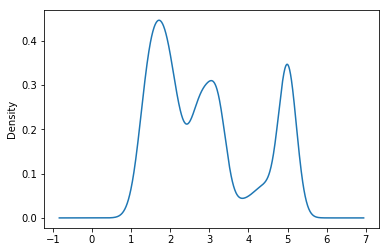

In [41]:
# plot density curve of Museums after cleaning null values
read_df.Museums.plot.density()

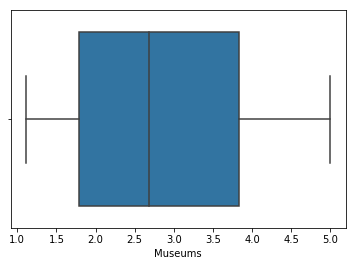

In [42]:
# plotting box plot of Museums
sns.boxplot(read_df['Museums'])   

In [43]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
read_df.Museums.describe()

count    5454.000000
mean        2.893423
std         1.282101
min         1.110000
25%         1.790000
50%         2.680000
75%         3.837500
max         5.000000
Name: Museums, dtype: float64

In [44]:
# displaying mode 
read_df.Museums.mode()

0    5.0
dtype: float64

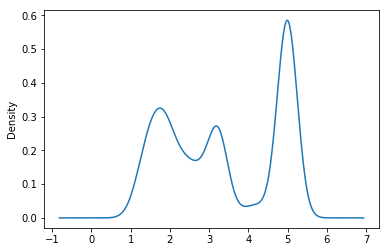

In [45]:
# plot density curve of Malls after cleaning null values
read_df.Malls.plot.density()

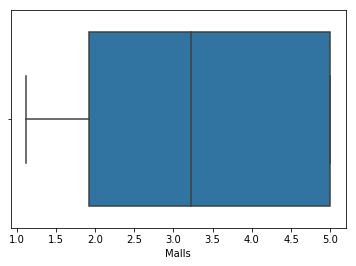

In [46]:
# plotting box plot of Malls
sns.boxplot(read_df['Malls'])   

In [47]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
read_df.Malls.describe()

count    5454.000000
mean        3.351476
std         1.413291
min         1.120000
25%         1.930000
50%         3.230000
75%         5.000000
max         5.000000
Name: Malls, dtype: float64

In [48]:
# displaying mode 
read_df.Malls.mode()

0    5.0
dtype: float64

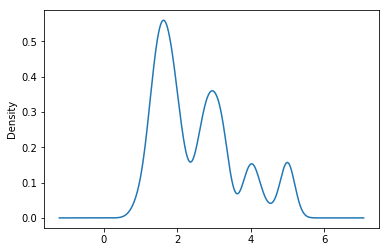

In [49]:
# plot density curve of Zoo after cleaning null values
read_df.Zoo.plot.density()

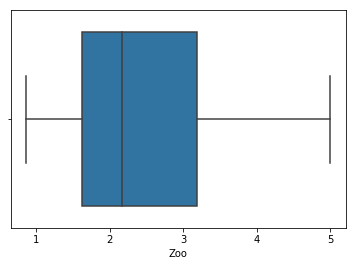

In [50]:
# plotting box plot of Zoo
sns.boxplot(read_df['Zoo'])   

In [51]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
read_df.Zoo.describe()

count    5454.000000
mean        2.541177
std         1.111398
min         0.860000
25%         1.620000
50%         2.170000
75%         3.190000
max         5.000000
Name: Zoo, dtype: float64

In [52]:
# displaying mode 
read_df.Zoo.mode()

0    5.0
dtype: float64

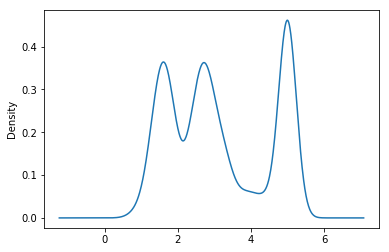

In [53]:
# plot density curve of Restaurants after cleaning null values
read_df.Restaurants.plot.density()

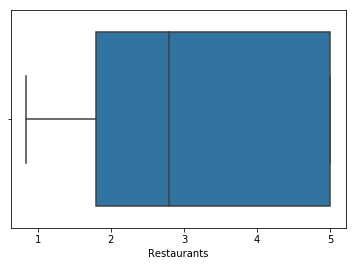

In [54]:
# plotting box plot of Restaurants
sns.boxplot(read_df['Restaurants'])   

In [55]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
read_df.Restaurants.describe()

count    5454.000000
mean        3.126542
std         1.356774
min         0.840000
25%         1.800000
50%         2.800000
75%         5.000000
max         5.000000
Name: Restaurants, dtype: float64

In [56]:
# displaying mode 
read_df.Restaurants.mode()

0    5.0
dtype: float64

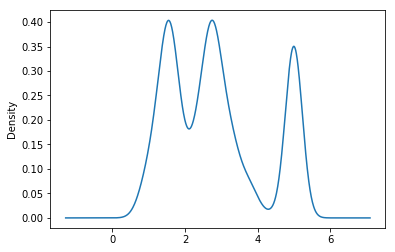

In [57]:
# plot density curve of Pubs_Bars after cleaning null values
read_df.Pubs_Bars.plot.density()

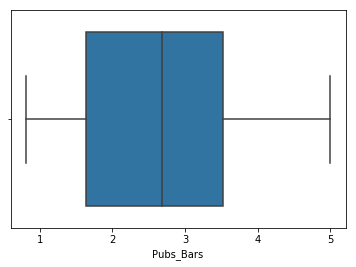

In [58]:
# plotting box plot of Pubs_Bars
sns.boxplot(read_df['Pubs_Bars'])   

In [59]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
read_df.Pubs_Bars.describe()

count    5454.000000
mean        2.832695
std         1.307299
min         0.810000
25%         1.640000
50%         2.680000
75%         3.527500
max         5.000000
Name: Pubs_Bars, dtype: float64

In [60]:
# displaying mode 
read_df.Pubs_Bars.mode()

0    5.0
dtype: float64

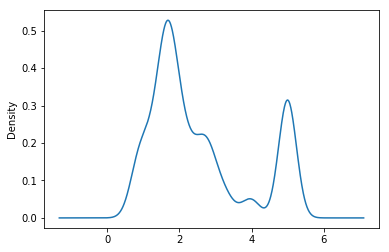

In [61]:
# plot density curve of Local_Services after cleaning null values
read_df.Local_Services.plot.density()

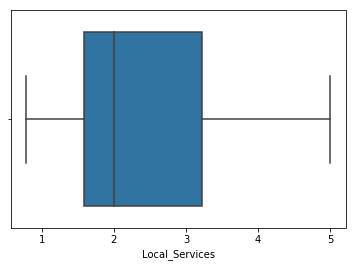

In [62]:
# plotting box plot of Local_Services
sns.boxplot(read_df['Local_Services'])   

In [63]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
read_df.Local_Services.describe()

count    5454.000000
mean        2.549622
std         1.381498
min         0.780000
25%         1.580000
50%         2.000000
75%         3.217500
max         5.000000
Name: Local_Services, dtype: float64

In [64]:
# displaying mode 
read_df.Local_Services.mode()

0    5.0
dtype: float64

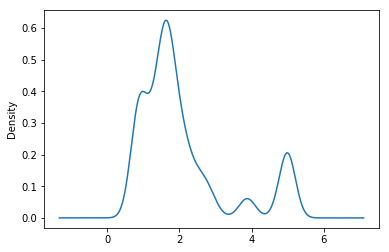

In [65]:
# plot density curve of Burger_Pizza_Shops after cleaning null values
read_df.Burger_Pizza_Shops.plot.density()

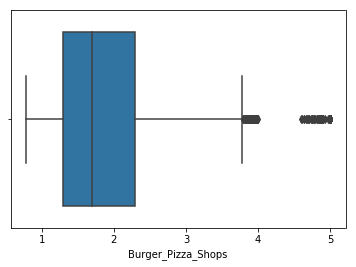

In [66]:
# plotting box plot of Burger_Pizza_Shops
sns.boxplot(read_df['Burger_Pizza_Shops'])   

In [67]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
read_df.Burger_Pizza_Shops.describe()

count    5454.000000
mean        2.078401
std         1.249315
min         0.780000
25%         1.290000
50%         1.690000
75%         2.287500
max         5.000000
Name: Burger_Pizza_Shops, dtype: float64

In [68]:
# displaying mode 
read_df.Burger_Pizza_Shops.mode()

0    5.0
dtype: float64

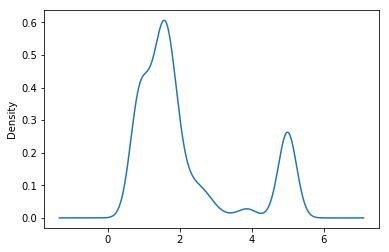

In [69]:
# plot density curve of Hotels after cleaning null values
read_df.Hotels.plot.density()

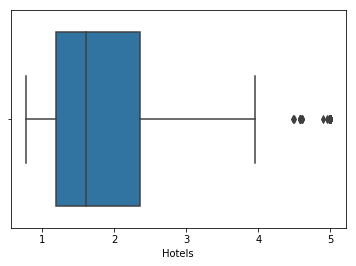

In [70]:
# plotting box plot of Hotels
sns.boxplot(read_df['Hotels'])   

In [71]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
read_df.Hotels.describe()

count    5454.000000
mean        2.125820
std         1.406682
min         0.770000
25%         1.190000
50%         1.610000
75%         2.360000
max         5.000000
Name: Hotels, dtype: float64

In [72]:
# displaying mode 
read_df.Hotels.mode()

0    5.0
dtype: float64

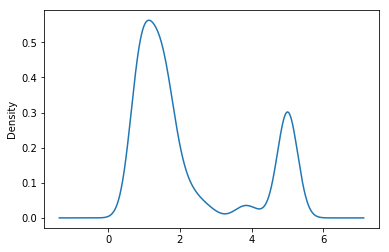

In [73]:
# plot density curve of Juice_Bars after cleaning null values
read_df.Juice_Bars.plot.density()

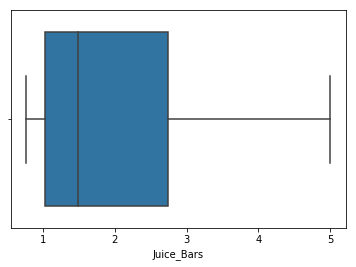

In [74]:
# plotting box plot of Juice_Bars
sns.boxplot(read_df['Juice_Bars'])   

In [75]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
read_df.Juice_Bars.describe()

count    5454.000000
mean        2.190429
std         1.576505
min         0.760000
25%         1.030000
50%         1.490000
75%         2.740000
max         5.000000
Name: Juice_Bars, dtype: float64

In [76]:
# displaying mode 
read_df.Juice_Bars.mode()

0    5.0
dtype: float64

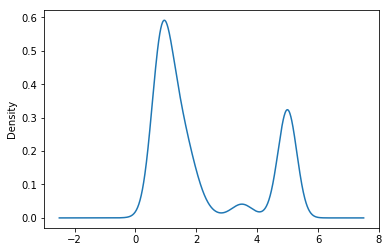

In [77]:
# plot density curve of Art_Galleries after cleaning null values
read_df.Art_Galleries.plot.density()

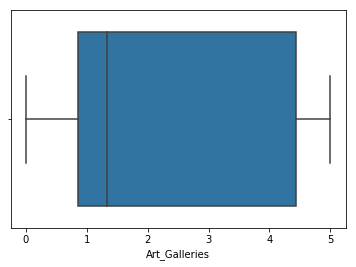

In [78]:
# plotting box plot of Art_Galleries
sns.boxplot(read_df['Art_Galleries'])   

In [79]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
read_df.Art_Galleries.describe()

count    5454.000000
mean        2.206140
std         1.715848
min         0.000000
25%         0.860000
50%         1.330000
75%         4.440000
max         5.000000
Name: Art_Galleries, dtype: float64

In [80]:
# displaying mode 
read_df.Art_Galleries.mode()

0    5.0
dtype: float64

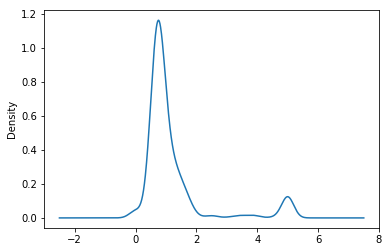

In [81]:
# plot density curve of Dance_Clubs after cleaning null values
read_df.Dance_Clubs.plot.density()

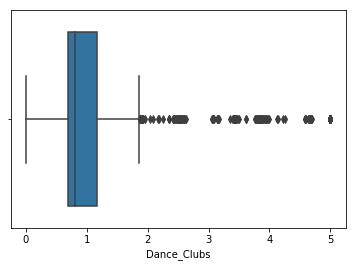

In [82]:
# plotting box plot of Dance_Clubs
sns.boxplot(read_df['Dance_Clubs'])   

In [83]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
read_df.Dance_Clubs.describe()

count    5454.000000
mean        1.192710
std         1.107176
min         0.000000
25%         0.690000
50%         0.800000
75%         1.160000
max         5.000000
Name: Dance_Clubs, dtype: float64

In [84]:
# displaying mode 
read_df.Dance_Clubs.mode()

0    5.0
dtype: float64

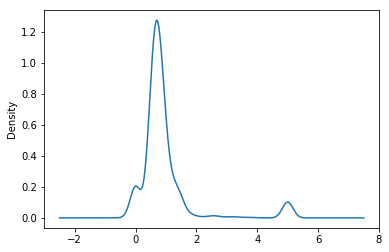

In [85]:
# plot density curve of Swimming_Pool after cleaning null values
read_df.Swimming_Pool.plot.density()

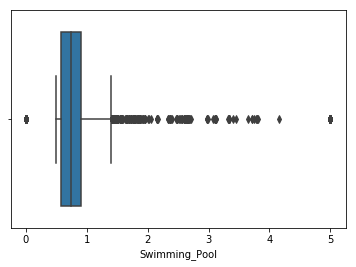

In [86]:
# plotting box plot of Swimming_Pool
sns.boxplot(read_df['Swimming_Pool'])   

In [87]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
read_df.Swimming_Pool.describe()

count    5454.000000
mean        0.949349
std         0.973628
min         0.000000
25%         0.580000
50%         0.740000
75%         0.910000
max         5.000000
Name: Swimming_Pool, dtype: float64

In [88]:
# displaying mode 
read_df.Swimming_Pool.mode()

0    0.0
dtype: float64

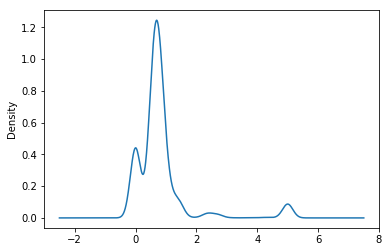

In [89]:
# plot density curve of Gyms after cleaning null values
read_df.Gyms.plot.density()

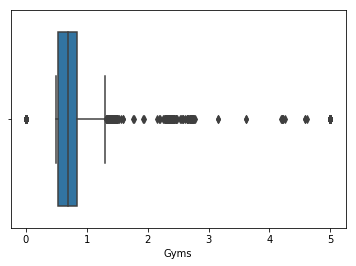

In [90]:
# plotting box plot of Gyms
sns.boxplot(read_df['Gyms'])   

In [91]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
read_df.Gyms.describe()

count    5454.000000
mean        0.822525
std         0.948015
min         0.000000
25%         0.530000
50%         0.690000
75%         0.840000
max         5.000000
Name: Gyms, dtype: float64

In [92]:
# displaying mode 
read_df.Gyms.mode()

0    0.0
dtype: float64

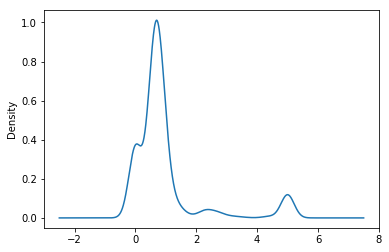

In [93]:
# plot density curve of Bakeries after cleaning null values
read_df.Bakeries.plot.density()

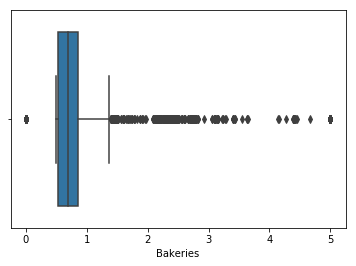

In [94]:
# plotting box plot of Bakeries
sns.boxplot(read_df['Bakeries'])   

In [95]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
read_df.Bakeries.describe()

count    5454.000000
mean        0.969250
std         1.202883
min         0.000000
25%         0.520000
50%         0.690000
75%         0.860000
max         5.000000
Name: Bakeries, dtype: float64

In [96]:
# displaying mode 
read_df.Bakeries.mode()

0    0.0
dtype: float64

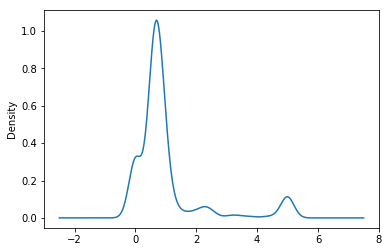

In [97]:
# plot density curve of Beauty_Spa after cleaning null values
read_df.Beauty_Spa.plot.density()

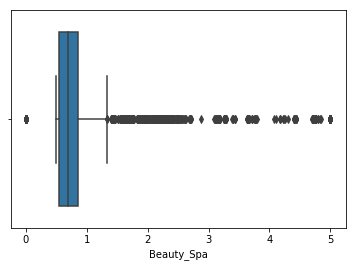

In [98]:
# plotting box plot of Beauty_Spa
sns.boxplot(read_df['Beauty_Spa'])   

In [99]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
read_df.Beauty_Spa.describe()

count    5454.000000
mean        0.999626
std         1.193129
min         0.000000
25%         0.540000
50%         0.690000
75%         0.860000
max         5.000000
Name: Beauty_Spa, dtype: float64

In [100]:
# displaying mode 
read_df.Beauty_Spa.mode()

0    0.0
dtype: float64

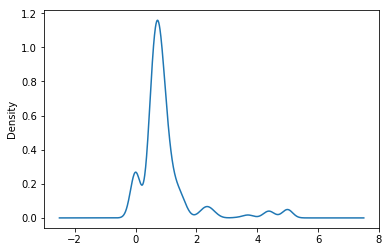

In [101]:
# plot density curve of Cafes after cleaning null values
read_df.Cafes.plot.density()

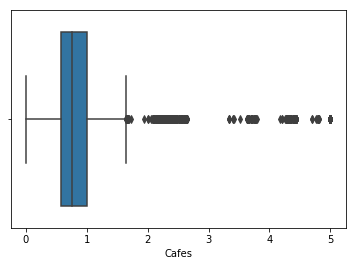

In [102]:
# plotting box plot of Cafes
sns.boxplot(read_df['Cafes'])   

In [103]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
read_df.Cafes.describe()

count    5454.000000
mean        0.965275
std         0.928326
min         0.000000
25%         0.570000
50%         0.760000
75%         1.000000
max         5.000000
Name: Cafes, dtype: float64

In [104]:
# displaying mode 
read_df.Cafes.mode()

0    0.0
dtype: float64

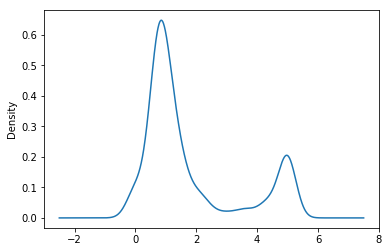

In [105]:
# plot density curve of View_Points after cleaning null values
read_df.View_Points.plot.density()

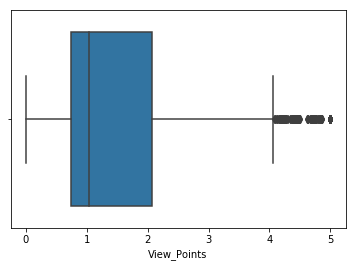

In [106]:
# plotting box plot of View_Points
sns.boxplot(read_df['View_Points'])   

In [107]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
read_df.View_Points.describe()

count    5454.000000
mean        1.749345
std         1.597816
min         0.000000
25%         0.740000
50%         1.030000
75%         2.070000
max         5.000000
Name: View_Points, dtype: float64

In [108]:
# displaying mode 
read_df.View_Points.mode()

0    5.0
dtype: float64

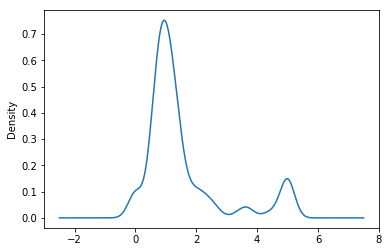

In [109]:
# plot density curve of Monuments after cleaning null values
read_df.Monuments.plot.density()

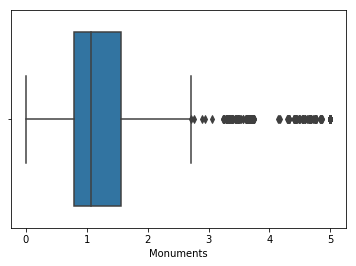

In [110]:
# plotting box plot of Monuments
sns.boxplot(read_df['Monuments'])   

In [111]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
read_df.Monuments.describe()

count    5454.000000
mean        1.531051
std         1.316180
min         0.000000
25%         0.790000
50%         1.070000
75%         1.560000
max         5.000000
Name: Monuments, dtype: float64

In [112]:
# displaying mode 
read_df.Monuments.mode()

0    5.0
dtype: float64

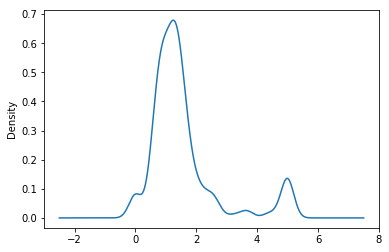

In [113]:
# plot density curve of Gardens after cleaning null values
read_df.Gardens.plot.density()

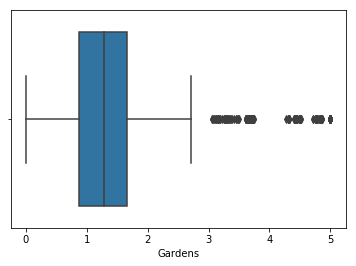

In [114]:
# plotting box plot of Gardens
sns.boxplot(read_df['Gardens'])   

In [115]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
read_df.Gardens.describe()

count    5454.000000
mean        1.560570
std         1.171784
min         0.000000
25%         0.880000
50%         1.290000
75%         1.660000
max         5.000000
Name: Gardens, dtype: float64

In [116]:
# displaying mode 
read_df.Gardens.mode()

0    5.0
dtype: float64

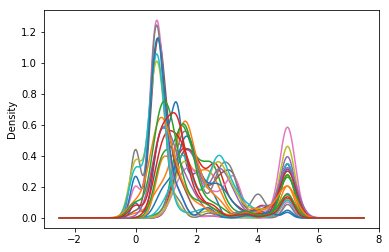

In [117]:
read_df.Churches.plot.density()
read_df.Resorts.plot.density()
read_df.Beaches.plot.density()
read_df.Parks.plot.density()
read_df.Theatres.plot.density()  
read_df.Museums.plot.density()
read_df.Malls.plot.density()
read_df.Zoo.plot.density()  
read_df.Restaurants.plot.density()    
read_df.Pubs_Bars.plot.density()
read_df.Local_Services.plot.density()
read_df.Burger_Pizza_Shops.plot.density()
read_df.Hotels.plot.density()
read_df.Juice_Bars.plot.density()
read_df.Art_Galleries.plot.density()
read_df.Dance_Clubs.plot.density()
read_df.Swimming_Pool.plot.density()
read_df.Gyms.plot.density()
read_df.Bakeries.plot.density()
read_df.Beauty_Spa.plot.density()
read_df.Cafes.plot.density()
read_df.View_Points.plot.density()
read_df.Monuments.plot.density()
read_df.Gardens.plot.density()

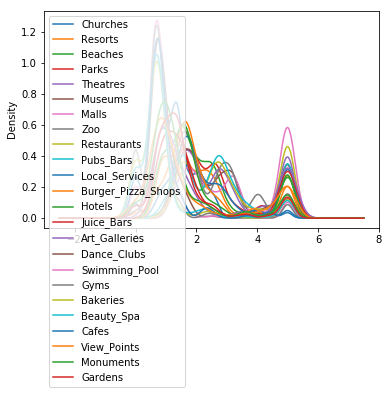

In [118]:
read_df.plot.density()

Text(0.5, 1.0, 'No of reviews under each category')

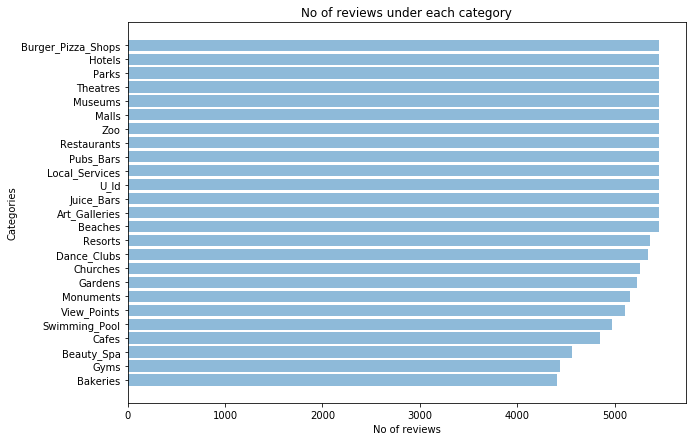

In [119]:
## check



# number of user have given ratings to each category; Gyms and Bakeries having least ratings
no_of_zeros = read_df[column_names[:]].astype(bool).sum(axis=0).sort_values()


plt.figure(figsize=(10,7))

plt.barh(np.arange(len(column_names[:])), no_of_zeros.values, align='center', alpha=0.5)

plt.yticks(np.arange(len(column_names[:])), no_of_zeros.index)

plt.xlabel('No of reviews')

plt.ylabel('Categories')

plt.title('No of reviews under each category')

In [142]:
avg_rating = read_df[column_names[1:]].mean()
avg_rating = avg_rating.sort_values()
avg_rating

Gyms                  0.822525
Swimming_Pool         0.949349
Cafes                 0.965275
Bakeries              0.969250
Beauty_Spa            0.999626
Dance_Clubs           1.192710
Churches              1.455746
Monuments             1.531051
Gardens               1.560570
View_Points           1.749345
Burger_Pizza_Shops    2.078401
Hotels                2.125820
Juice_Bars            2.190429
Art_Galleries         2.206140
Resorts               2.320048
Beaches               2.489059
Zoo                   2.541177
Local_Services        2.549622
Parks                 2.797103
Pubs_Bars             2.832695
Museums               2.893423
Theatres              2.958904
Restaurants           3.126542
Malls                 3.351476
dtype: float64

Text(0.5, 1.0, 'Average rating per Category')

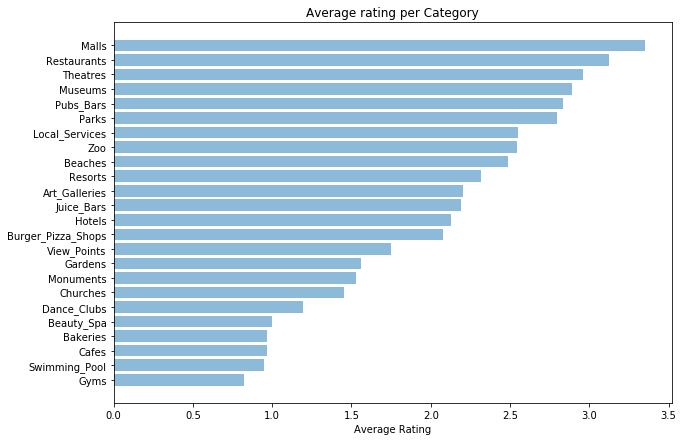

In [143]:
plt.figure(figsize=(10,7))
plt.barh(np.arange(len(column_names[1:])), avg_rating.values, align='center', alpha=0.5)
plt.yticks(np.arange(len(column_names[1:])), avg_rating.index)
plt.xlabel('Average Rating')
plt.title('Average rating per Category')

In [122]:
entertainment = ['Theatres', 'Dance_Clubs', 'Malls']
food_travel = ['Restaurants', 'Pubs_Bars', 'Burger_Pizza_Shops', 'Juice_Bars', 'Bakeries', 'Cafes']
places_of_stay = ['Hotels', 'Resorts']
historical = ['Churches', 'Museums', 'Art_Galleries', 'Monuments']
nature = ['Beaches', 'Parks', 'Zoo', 'View_Points', 'Gardens']
services = ['Local_Services', 'Swimming_Pool', 'Gyms', 'Beauty_Spa']

In [123]:
df_category_reviews = pd.DataFrame(columns = ['entertainment', 'food_travel', 'places_of_stay', 'historical', 'nature', 'services'])

In [124]:
df_category_reviews['entertainment'] = read_df[entertainment].mean(axis = 1)                 # Doubt y we take axis =1
df_category_reviews['food_travel'] = read_df[food_travel].mean(axis = 1)
df_category_reviews['places_of_stay'] = read_df[places_of_stay].mean(axis = 1)
df_category_reviews['historical'] = read_df[historical].mean(axis = 1)
df_category_reviews['nature'] = read_df[nature].mean(axis = 1)
df_category_reviews['services'] = read_df[services].mean(axis = 1)

In [125]:
df_category_reviews['entertainment']

0       3.530000
1       3.530000
2       3.530000
3       3.530000
4       3.530000
5       3.530000
6       2.873333
7       3.533333
8       2.876667
9       3.530000
10      3.530000
11      3.526667
12      3.526667
13      3.540000
14      2.826667
15      2.826667
16      2.150000
17      2.143333
18      2.166667
19      2.160000
20      2.176667
21      2.166667
22      2.170000
23      2.193333
24      2.200000
25      2.193333
26      2.193333
27      2.193333
28      2.153333
29      2.156667
          ...   
5426    2.006667
5427    1.986667
5428    1.986667
5429    2.013333
5430    1.986667
5431    1.980000
5432    1.983333
5433    1.983333
5434    1.976667
5435    1.980000
5436    1.976667
5437    1.973333
5438    1.980000
5439    1.973333
5440    1.973333
5441    1.970000
5442    1.966667
5443    1.963333
5444    1.966667
5445    1.963333
5446    1.963333
5447    1.960000
5448    1.960000
5449    1.956667
5450    1.956667
5451    1.953333
5452    1.733333
5453    1.7266

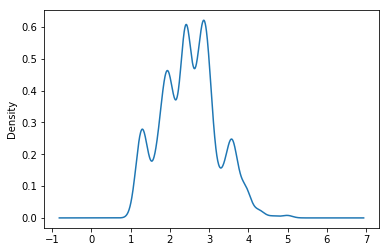

In [126]:
# plot density curve of entertainment 
df_category_reviews.entertainment.plot.density()

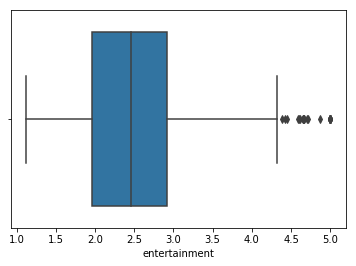

In [127]:
# plotting box plot of entertainment
sns.boxplot(df_category_reviews['entertainment'])   

In [128]:
# displaying no. of rows(count), mean, median(50%), standard deviation, min, max values
df_category_reviews.entertainment.describe()

count    5454.000000
mean        2.501030
std         0.722052
min         1.120000
25%         1.964167
50%         2.453333
75%         2.916667
max         5.000000
Name: entertainment, dtype: float64

In [129]:
# displaying mode 
df_category_reviews.entertainment.mode()

0    2.373333
dtype: float64

In [130]:
df_category_reviews.describe()

,entertainment,food_travel,places_of_stay,historical,nature,services
count,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000
mean,2.501030,2.027099,2.222934,2.021590,2.227451,1.330281
std,0.722052,0.549316,0.886587,0.584872,0.662565,0.580751
min,1.120000,0.721667,0.730000,0.557500,0.576000,0.205000
25%,1.964167,1.650000,1.470000,1.647500,1.762000,0.937500
50%,2.453333,2.027500,1.885000,1.977500,2.160000,1.245000
75%,2.916667,2.433333,3.160000,2.392500,2.656000,1.685000
max,5.000000,3.873333,5.000000,4.322500,4.520000,3.937500


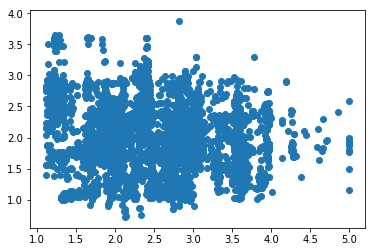

In [131]:
X=np.array(df_category_reviews)
plt.scatter(X[:,0],X[:,1], label='True Position')     # X contains row and column- row all and column 0 and column 1

In [132]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
print(kmeans.cluster_centers_)

[[2.03444254 1.94931675 2.01313894 2.27331046 2.14718353 2.30853774]
 [2.80655051 2.03515397 3.4187034  2.15879457 2.49642788 1.13771272]
 [2.22085048 2.21692215 1.42566872 1.6171142  1.98834362 1.31366512]
 [1.8732772  2.65544689 2.95721503 1.62484456 1.44233161 1.51510363]
 [3.26070871 1.87897297 1.56097297 2.24188514 2.13321081 1.0203536 ]
 [2.2567433  1.42714134 1.69877395 2.19891762 3.0678212  1.18314176]]


In [133]:
y_predict=kmeans.fit_predict(df_category_reviews[['entertainment', 'food_travel', 'places_of_stay', 'historical', 'nature', 'services']])
y_predict

array([3, 3, 3, ..., 0, 0, 4])

In [134]:
df_category_reviews['cluster']=y_predict
df_category_reviews.head(20)
#df_category_reviews.drop('Avg_Ratings',axis=1)

,entertainment,food_travel,places_of_stay,historical,nature,services,cluster
0,3.530000,1.480000,0.850,1.1650,1.926,0.5500,3
1,3.530000,1.481667,0.850,1.1650,1.984,0.5500,3
2,3.530000,1.480000,0.850,1.1650,1.980,0.5500,3
3,3.530000,1.480000,1.100,1.1650,1.922,0.5575,3
4,3.530000,1.480000,0.850,1.1650,1.980,0.5500,3
5,3.530000,1.481667,0.845,1.1650,1.978,0.5525,3
6,2.873333,1.476667,3.345,1.1675,1.922,0.5575,2
7,3.533333,1.476667,3.345,1.1650,1.978,0.5500,2
8,2.876667,1.470000,3.340,0.9175,1.980,0.4275,2
9,3.530000,1.386667,3.335,0.9150,1.926,0.4225,2


In [135]:
print(kmeans.labels_)

[3 3 3 ... 0 0 4]


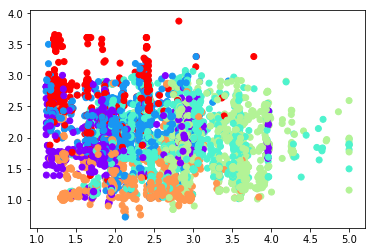

In [136]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

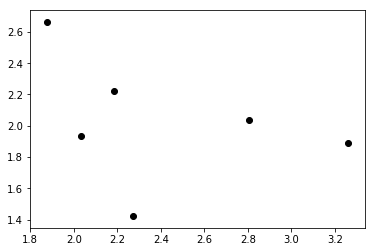

In [137]:
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
y=df_category_reviews.cluster
y.head()
x=df_category_reviews.iloc[:,0:6]
x.head()
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)
#trainset, testset = train_test_split(df_category_reviews, test_size=0.25, random_state = 0)

In [139]:
x_train.head()

,entertainment,food_travel,places_of_stay,historical,nature,services
104,3.590000,1.246667,1.045,3.0150,1.480,1.1275
188,2.920000,2.346667,3.295,2.7300,2.214,0.5700
3757,1.196667,2.535000,3.190,1.9225,1.098,1.7750
3204,5.000000,1.806667,3.370,2.0625,1.908,1.7200
3133,3.010000,2.200000,3.140,1.1825,2.876,1.9400


In [140]:
x_test.head()

,entertainment,food_travel,places_of_stay,historical,nature,services
3916,3.070000,2.080000,5.000,2.2925,3.278,1.1200
3101,2.333333,2.178333,1.735,2.1900,3.244,1.5975
1527,3.586667,2.275000,1.105,2.1475,1.646,1.6700
502,2.623333,1.956667,1.765,1.5500,3.016,1.0300
1172,3.710000,2.288333,1.785,1.1150,2.350,1.2950


In [141]:
for k in range(1,100):
    k_value=k+1
    model=KNeighborsClassifier(n_neighbors=k_value, weights="uniform", algorithm='auto')
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    print("Accuracy", accuracy_score(y_test,y_predict)*100,"% for k values:", k_value)

Accuracy 94.40879926672777 % for k values: 2
Accuracy 95.32538955087077 % for k values: 3
Accuracy 93.95050412465628 % for k values: 4
Accuracy 94.50045829514208 % for k values: 5
Accuracy 94.77543538038496 % for k values: 6
Accuracy 94.40879926672777 % for k values: 7
Accuracy 94.31714023831348 % for k values: 8
Accuracy 94.22548120989917 % for k values: 9
Accuracy 94.31714023831348 % for k values: 10
Accuracy 94.40879926672777 % for k values: 11
Accuracy 94.59211732355637 % for k values: 12
Accuracy 94.22548120989917 % for k values: 13
Accuracy 93.58386801099908 % for k values: 14
Accuracy 93.95050412465628 % for k values: 15
Accuracy 93.95050412465628 % for k values: 16
Accuracy 93.67552703941338 % for k values: 17
Accuracy 93.58386801099908 % for k values: 18
Accuracy 93.76718606782768 % for k values: 19
Accuracy 93.67552703941338 % for k values: 20
Accuracy 93.40054995417049 % for k values: 21
Accuracy 93.30889092575619 % for k values: 22
Accuracy 92.7589367552704 % for k values: 